<a href="https://colab.research.google.com/github/vutung3196/DevC-Challenge-Data-Science/blob/master/DevC-Challenge-Data-Science/Week%204_Assignment_TungVu/Linear_regression_assignment_Tung_Vu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Week 1: Simple Linear Regression

In this notebook we will use data on house sales in King County to predict house prices using simple (one input) linear regression. You will:
* Compute important summary statistics
* Write a function to compute the Simple Linear Regression weights using the closed form solution
* Write a function to make predictions of the output given the input feature
* Turn the regression around to predict the input given the output
* Compare two different models for predicting house prices

In this notebook you will be provided with some already complete code as well as some code that you should complete yourself in order to answer quiz questions. The code we provide to complte is optional and is there to assist you with solving the problems but feel free to ignore the helper code and write your own.

# Fire up Sklearn + Pandas + Numpy 

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from google.colab import files

# Load house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [ ]:
# Data type format
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [ ]:
data_to_load = files.upload()


Saving kc_house_data.csv to kc_house_data.csv


In [ ]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)

In [ ]:
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131,3,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530.0,1509.0
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813,2,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830.0,7200.0
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350,2,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020.0,2007.0
21611,0291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388,2,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410.0,1287.0


In [ ]:
# Show all columns
print(sales.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [ ]:
# Select only sqft and price to train 
X = sales['sqft_living']
y = sales['price']

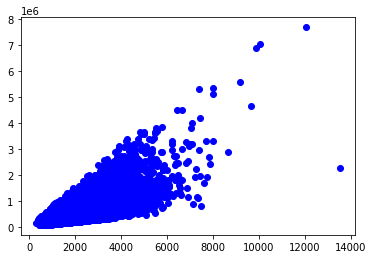

In [ ]:
# Plot the data 
%matplotlib inline
plt.plot(X, y, 'bo')

# Split data into training and testing

We use random_state=42 so that everyone running this notebook gets the same results.  In practice, you may set a random_state.  

In [ ]:
# Note: Using train_test_split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Summary data

In [ ]:
# Let's compute the mean of the House Prices in King County in 2 different ways.
prices = sales['price'] 

# recall that the arithmetic average (the mean) is the sum of the prices divided by the total number of houses:
# Use numpy 
sum_prices = np.sum(prices) # Or prices.sum()
num_houses = len(prices)
# There is two method to compute mean 
avg_price_1 = sum_prices/num_houses
avg_price_2 = np.mean(prices)
print("average price via method 1: ", str(avg_price_1))
print("average price via method 2: ", str(avg_price_2))

average price via method 1:  540088.1417665294
average price via method 2:  540088.1417665294


As we see we get the same answer both ways

In [ ]:
# if we want to multiply every price by 0.5 it's a simple as:
half_prices = 0.5*prices
# Let's compute the sum of squares of price. We can multiply two Pandas array of the same length elementwise also with *
prices_squared = prices*prices
sum_prices_squared = prices_squared.sum() # price_squared is an Pandas array of the squares and we want to add them up.
print("the sum of price squared is: ", str(sum_prices_squared))

the sum of price squared is:  9217325138472070.0


Aside: The python notation x.xxe+yy means x.xx \* 10^(yy). e.g 100 = 10^2 = 1*10^2 = 1e2 

# Build a generic simple linear regression function 

Armed with these functions we can use the closed form solution found from lecture to compute the slope and intercept for a simple linear regression on observations: input_feature, output.

Complete the following function (or write your own) to compute the simple linear regression slope and intercept:

In [ ]:
def simple_linear_regression(input_feature, output):
    # compute the sum of input_feature and output
    sum = (input_feature + output).sum()
    # compute the product of the output and the input_feature and its sum
    product = (output * input_feature).sum()
    # compute the squared value of the input_feature and its sum
    square_input = (input_feature * input_feature).sum()
    size = len(input_feature)
    # use the formula for the slope
    slope =  (size * product - output.sum() * input_feature.sum()) / (square_input * size - (input_feature.sum() * input_feature.sum()))  
    # use the formula for the intercept
    # intercept = (output.sum() * square_input - input_feature.sum() * product) / (square_input * size - (input_feature.sum() * input_feature.sum())) 
    intercept = np.mean(output) - np.mean(input_feature)*slope
    return (intercept, slope)

We can test that our function works by passing it something where we know the answer. In particular we can generate a feature and then put the output exactly on a line: output = 1 + 1\*input_feature then we know both our slope and intercept should be 1

In [ ]:
test_feature = np.array(range(5))
test_output = test_feature + 1 
(test_intercept, test_slope) =  simple_linear_regression(test_feature, test_output)
print("Intercept: ", str(test_intercept))
print("Slope: ", str(test_slope))

Intercept:  1.0
Slope:  1.0


Now that we know it works let's build a regression model for predicting price based on sqft_living. Rembember that we train on train_data!

In [ ]:
print("X train: ", X_train)
print("Y train: ", y_train)
sqft_intercept, sqft_slope = simple_linear_regression(X_train, y_train)

print("Intercept: ", str(sqft_intercept))
print("Slope: ", str(sqft_slope))

X train:  6325     1780.0
13473    1000.0
17614    1080.0
16970    2090.0
20868    1741.0
          ...  
11964    1000.0
21575    3087.0
5390     2120.0
860       380.0
15795    3130.0
Name: sqft_living, Length: 17290, dtype: float64
Y train:  6325     325000.0
13473    257000.0
17614    228500.0
16970    288000.0
20868    479000.0
           ...   
11964    378000.0
21575    399950.0
5390     575000.0
860      245000.0
15795    315000.0
Name: price, Length: 17290, dtype: float64
Intercept:  -41999.18603993708
Slope:  279.5547793152637


# Predicting Values

Now that we have the model parameters: intercept & slope we can make predictions. Complete the following function to return the predicted output given the input_feature, slope and intercept:

In [ ]:
def get_regression_predictions(input_feature, intercept, slope):
    # calculate the predicted values:
    predicted_values = input_feature*slope + intercept
    return predicted_values

Now that we can calculate a prediction given the slope and intercept let's make a prediction. Use (or alter) the following to find out the estimated price for a house with 2650 squarefeet according to the squarefeet model we estiamted above.

**Quiz Question: Using your Slope and Intercept from (4), What is the predicted price for a house with 2650 sqft?**

In [ ]:
my_house_sqft = 2650
estimated_price = get_regression_predictions(my_house_sqft, sqft_intercept, sqft_slope)
print("The estimated price for a house with %d squarefeet is $%.2f" % (my_house_sqft, estimated_price))

The estimated price for a house with 2650 squarefeet is $698820.98


# Residual Sum of Squares

Now that we have a model and can make predictions let's evaluate our model using Residual Sum of Squares (RSS). Recall that RSS is the sum of the squares of the residuals and the residuals is just a fancy word for the difference between the predicted output and the true output. 

Complete the following (or write your own) function to compute the RSS of a simple linear regression model given the input_feature, output, intercept and slope:

In [ ]:
def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    # First get the predictions
    predictions = intercept*input_feature + slope

    # then compute the residuals (since we are squaring it doesn't matter which order you subtract)
    residuals = predictions - output
    # square the residuals and add them up
    RSS = (residuals * residuals).sum()
    return(RSS)

Let's test our get_residual_sum_of_squares function by applying it to the test model where the data lie exactly on a line. Since they lie exactly on a line the residual sum of squares should be zero!

In [ ]:
print(get_residual_sum_of_squares(test_feature, test_output, test_intercept, test_slope)) 

0.0


Now use your function to calculate the RSS on training data from the squarefeet model calculated above.

**Quiz Question: According to this function and the slope and intercept from the squarefeet model What is the RSS for the simple linear regression using squarefeet to predict prices on TRAINING data?**

In [ ]:
rss_prices_on_sqft = get_residual_sum_of_squares(X_train, y_train, sqft_intercept, sqft_slope)
print('The RSS of predicting Prices based on Square Feet is : ' + str(rss_prices_on_sqft))

The RSS of predicting Prices based on Square Feet is : 1.5823960260129885e+20


# Predict the squarefeet given price

What if we want to predict the squarefoot given the price? Since we have an equation y = a + b\*x we can solve the function for x. So that if we have the intercept (a) and the slope (b) and the price (y) we can solve for the estimated squarefeet (x).

Complete the following function to compute the inverse regression estimate, i.e. predict the input_feature given the output.

In [ ]:
def inverse_regression_predictions(output, intercept, slope):
    # solve output = intercept + slope*input_feature for input_feature. Use this equation to compute the inverse predictions:

    return estimated_feature

Now that we have a function to compute the squarefeet given the price from our simple regression model let's see how big we might expect a house that costs $800,000 to be.

**Quiz Question: According to this function and the regression slope and intercept from (3) what is the estimated square-feet for a house costing $800,000?**

In [ ]:
my_house_price = 800000
estimated_squarefeet = inverse_regression_predictions(my_house_price, sqft_intercept, sqft_slope)
print "The estimated squarefeet for a house worth $%.2f is %d" % (my_house_price, estimated_squarefeet)

# New Model: estimate prices from bedrooms

We have made one model for predicting house prices using squarefeet, but there are many other features in the sales SFrame. 
Use your simple linear regression function to estimate the regression parameters from predicting Prices based on number of bedrooms. Use the training data!

In [ ]:
# Estimate the slope and intercept for predicting 'price' based on 'bedrooms'



# Test your Linear Regression Algorithm

Now we have two models for predicting the price of a house. How do we know which one is better? Calculate the RSS on the TEST data (remember this data wasn't involved in learning the model). Compute the RSS from predicting prices using bedrooms and from predicting prices using squarefeet.

**Quiz Question: Which model (square feet or bedrooms) has lowest RSS on TEST data? Think about why this might be the case.**

In [ ]:
# Compute RSS when using bedrooms on TEST data:


In [ ]:
# Compute RSS when using squarefeet on TEST data:


# Visual your linear model along with data 

Now it's the time to visual your model, using matplotlib 

In [ ]:
# Your code here 

# Using Sklearn's Linear Regression 

Sklearn is a great Machine Learning Library, so you could use it for implement and compare with your model 

In [ ]:
# Load model 
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

In [ ]:
# Your code here 

# Compare your model with Sklearn

In [ ]:
# Print the RSS on test data 

In [ ]:
# Plot data and 2 models to compare 

# Least Square model 

It's the time to use all variables to train, let's start with Least Squares  first, it could be better if you can compare between Least Squares of Linear Regression and LS of Ridge Regression. Remember, you must use all variables, checkout the formular of LS in LinearRegressionAndLogisticRegression.pdf and do it with numpy 

In [ ]:
# Your LS code here 

In [ ]:
# Your RSS function here 

In [ ]:
# Print the RSS value 

# Sklearn model 

Let's build a Sklearn model using Linear model above with all variables and compare with Least Square 

In [ ]:
# Your Sklearn code here 

In [ ]:
# Your RSS show here 

# Advanced: Can you build your own one? 
It's time to build a Linear Regression with Gradient Descent, Let's build LS model with and without Regularization, including all variables and make comparison, have fun!

In [ ]:
# Define your model here 

# Create some new features

Although we often think of multiple regression as including multiple different features (e.g. # of bedrooms, squarefeet, and # of bathrooms) but we can also consider transformations of existing features e.g. the log of the squarefeet or even "interaction" features such as the product of bedrooms and bathrooms.
You will use the logarithm function to create a new feature. so first you should import it from the math library.

Next create the following 4 new features as column in both TEST and TRAIN data:
* bedrooms_squared = bedrooms\*bedrooms
* bed_bath_rooms = bedrooms\*bathrooms
* log_sqft_living = log(sqft_living)
* lat_plus_long = lat + long 
As an example here's the first one:

In [ ]:
# create the remaining 3 features in both TEST and TRAIN data



* Squaring bedrooms will increase the separation between not many bedrooms (e.g. 1) and lots of bedrooms (e.g. 4) since 1^2 = 1 but 4^2 = 16. Consequently this feature will mostly affect houses with many bedrooms.
* bedrooms times bathrooms gives what's called an "interaction" feature. It is large when *both* of them are large.
* Taking the log of squarefeet has the effect of bringing large values closer together and spreading out small values.
* Adding latitude to longitude is totally non-sensical but we will do it anyway (you'll see why)

In [ ]:
# Build models with new features by your own above models